In [3]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: remove '..' if run from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..'))
pths = [home]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')

In [4]:
import deeprad.image2vec as i2v
from deeprad import utils 
to_poly_np, to_poly_sh = i2v.to_poly_np, i2v.to_poly_sh
from shapely import affinity
import shapely.geometry as geom

from rtree import index
from sklearn.mixture import GaussianMixture
from copy import copy
import cv2 

figsize_default = np.array((5, 5))

In [54]:
# RADCMAP = plt.get_cmap('RdYlBu_r')
# ctmpf = os.path.join(os.getcwd(), 'img_0.jpg')
# img = utils.load_img_gray(ctmpf)

# # TODO: add a mask here
# img = np.where(img < (255 - 1e-10), img, np.nan)  
# plt.imshow(img, cmap=rad_cmap, vmin=0, vmax=255)





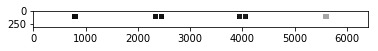

In [55]:
DEEPRAD_TRAINTEST_DIR = utils.DEEPRAD_TRAINTEST_DIR
DEEPRAD_TRAINTEST_DIR = DEEPRAD_TRAINTEST_DIR.replace('/deeprad/', '/')
img_fpath = os.path.join(DEEPRAD_TRAINTEST_DIR, 'out_data', 'out_floorplan_1.jpg')
_img = utils.load_img_gray(img_fpath)
plt.imshow(_img, cmap='gray')

x, y dim (300, 6400)


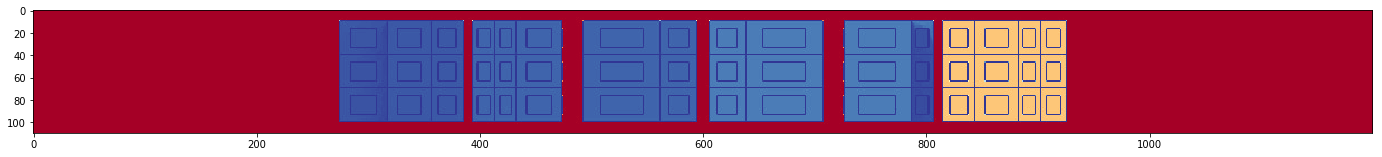

In [66]:
print('x, y dim', img.shape)

img = _img.copy()
RADCMAP = plt.get_cmap('RdYlBu_r')

def crop_orients(img, border_width=2):
    """Crop x, y dims. border_width is edges of images."""
    ret_mid_xdim = 600
    gap_tol = 100  # naturally occuring gaps in buildings in pixels
    assert border_width % 2 == 0, 'border_width must be multiple of 2.'
    buf = border_width
    buf_half = int(border_width / 2)
    ret_img = np.ones((110, ret_mid_xdim * 2)) * 255

    
    # create bit x-proj
    bit_img = np.where(img == 255, 0, 1)
    xproj = np.sum(bit_img, axis=0).astype(bool)
    xproj = np.logical_not(xproj)

    #xproj_viz = np.stack([xproj] * 300, axis=0)
    #plt.imshow(xproj_viz, cmap='gray')

    white_idx = i2v.contiguous_ones_idx(xproj)
    pix_gap = white_idx[:, 1] - white_idx[:, 0]

    gap_idx = np.where(pix_gap > gap_tol)
    white_idx = white_idx[gap_idx]
    # print(white_idx)

    crop_img = [0] * (white_idx.shape[0] - 1)
    ymin, ymax = 50, 150 + 10
    # crop from original image
    for i in range(white_idx.shape[0] - 1):
        i1, i2 = white_idx[i, 1], white_idx[i+1, 0]
        # TODO: add a border
        _crop_img = _img[ymin:ymax, i1-buf:i2+buf]
        _crop_img = +img[:,i1-buf + ]
        crop_img[i] = _crop_img

    crop_img = np.concatenate(crop_img, axis=1)
    
    assert crop_img.shape[1] <= ret_img.shape[1], \
        'crop_img larger then return img. Expand overall size ' \
        ' to {} from {}.'.format(ret_img.shape, crop_img.shape)

    # center add to ret_img
    mid_xdim = int(np.floor(crop_img.shape[1] / 2.0))
    move_idx = ret_mid_xdim - mid_xdim
    ret_img[:, move_idx: move_idx + mid_xdim * 2] = crop_img

    return ret_img / 255.0


cropped = crop_orients(img)

_, a = plt.subplots(figsize=(24, 12))
a.imshow(cropped, cmap=RADCMAP)


